In [1]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

 CUDA-version: 11000 (11000), cuDNN: 8.0.2, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-32GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    640 x 480 x   3 ->  320 x 240 x  32 0.133 BF
   1 conv     64       3 x 3/ 2    320 x 240 x  32 ->  160 x 120 x  64 0.708 BF
   2 conv     64       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x  64 1.416 BF
   3 route  2 		                       1/2 ->  160 x 120 x  32 
   4 conv     32       3 x 3/ 1    160 x 120 x  32 ->  160 x 120 x  32 0.354 BF
   5 conv     32       3 x 3/ 1    160 x 120 x  32 ->  160 x 120 x  32 0.354 BF
   6 route  5 4 	                           ->  160 x 120 x  64 
   7 conv     64       1 x 1/ 1    160 x 120 x  64 ->  160 x 120 x  64 0.157 BF
   8 route

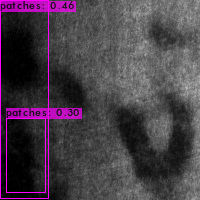

In [4]:
!cd darknet; ./darknet detector test \
../cfg/setting.data \
../cfg/yolov4-tiny-obj.cfg \
../cfg/weights/yolov4-tiny-obj_last.weights \
../NEU-DET/validation/images/patches/patches_289.jpg -ext_output; \
cp predictions.jpg ../
Image.open("predictions.jpg")

 CUDA-version: 11040 (11040), cuDNN: 8.2.2, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-32GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    640 x 480 x   3 ->  320 x 240 x  32 0.133 BF
   1 conv     64       3 x 3/ 2    320 x 240 x  32 ->  160 x 120 x  64 0.708 BF
   2 conv     64       3 x 3/ 1    160 x 120 x  64 ->  160 x 120 x  64 1.416 BF
   3 route  2 		                       1/2 ->  160 x 120 x  32 
   4 conv     32       3 x 3/ 1    160 x 120 x  32 ->  160 x 120 x  32 0.354 BF
   5 conv     32       3 x 3/ 1    160 x 120 x  32 ->  160 x 120 x  32 0.354 BF
   6 route  5 4 	                           ->  160 x 120 x  64 
   7 conv     64       1 x 1/ 1    160 x 120 x  64 ->  160 x 120 x  64 0.157 BF
   8 route

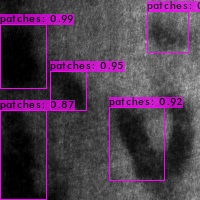

In [45]:
!cd darknet; ./darknet detector test \
../cfg/setting.data \
../cfg/yolov4-tiny-obj.cfg \
../cfg/weights/yolov4-tiny-obj_last.weights \
../NEU-DET/validation/images/patches/patches_289.jpg -ext_output; \
cp predictions.jpg ../
Image.open("predictions.jpg")

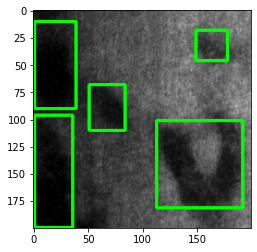

In [5]:
# 顯示人工標記
predpath = './NEU-DET/validation/images/patches/patches_289.jpg'
img = cv2.imread(predpath)
height,width = img.shape[:2]
f = open(predpath[:-3]+'txt', 'r')
for line in f.readlines():
#     print(line.split(' '))
    [label, x, y, w, h] = line.split(' ')
#     label = line[0]
    x = int(float(x) * width)
    y = float(y) * height
    w = float(w) * width
    h = float(h) * height
    x1 = int(x- w/2)
    y1 = int(y-h/2)
    x2 = int(x+w/2)
    y2 = int(y+h/2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
f.close
plt.imshow(img)